- Get data from drive [link text](https://drive.google.com/file/d/19oZR2y1_ixa7g-jCT96ZoCmfPVAbmNAi/view?usp=sharing)

## Understanding Data

- importing Required Libraries

In [ ]:
import pathlib
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import numpy as np
import tensorflow as tf
import os
from scipy import signal

import seaborn as sns

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

- Downloading fomr google drive and setting up Data

In [ ]:
!gdown --id 19oZR2y1_ixa7g-jCT96ZoCmfPVAbmNAi
!unzip voice_data.zip -d /content/
!rm -r voice_data.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19oZR2y1_ixa7g-jCT96ZoCmfPVAbmNAi
To: /content/voice_data.zip
100% 6.35M/6.35M [00:00<00:00, 14.7MB/s]
Archive:  voice_data.zip
   creating: /content/data/
   creating: /content/data/red/
  inflating: /content/data/red/red_0.wav  
  inflating: /content/data/red/red_1.wav  
  inflating: /content/data/red/red_2.wav  
  inflating: /content/data/red/red_3.wav  
  inflating: /content/data/red/red_4.wav  
  inflating: /content/data/red/red_5.wav  
  inflating: /content/data/red/red_6.wav  
  inflating: /content/data/red/red_7.wav  
  inflating: /content/data/red/red_8.wav  
  inflating: /content/data/red/red_9.wav  
  inflating: /content/data/red/red_10.wav  
  inflating: /content/data/red/red_11.wav  
  inflating: /cont

- Visualizing Raw Wavefiles Data

Text(0.5, 1.0, 'Audio: Green')

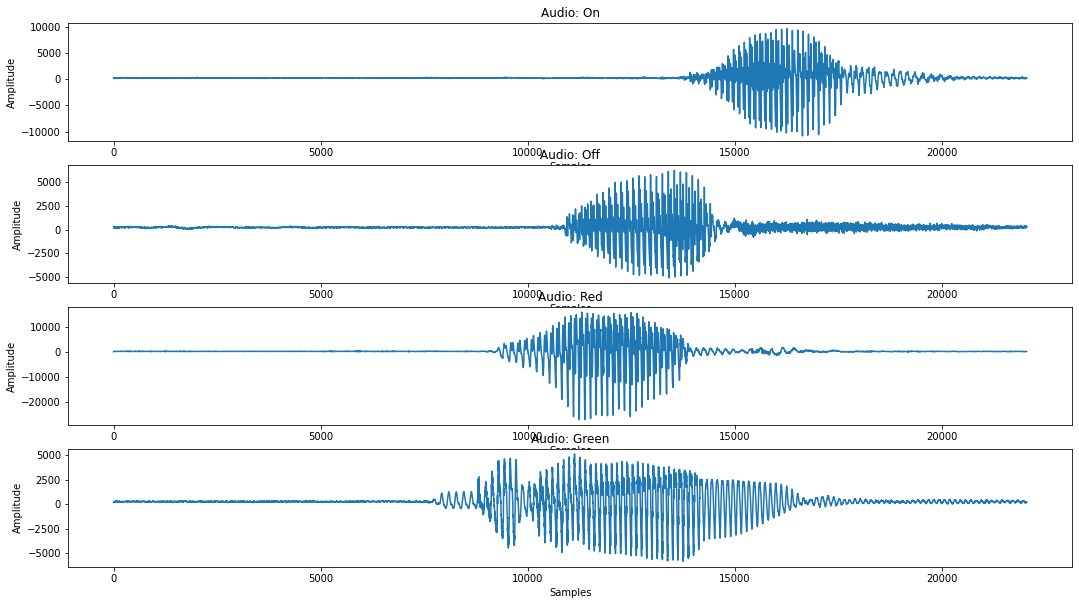

In [ ]:
on_wav_file = read('/content/data/on/on_0.wav')
off_wav_file = read('/content/data/off/off_0.wav')
red_wav_file = read('/content/data/red/red_0.wav')
green_wav_file = read('/content/data/green/green_0.wav')

on_wav_file = on_wav_file[1]
off_wav_file = off_wav_file[1]
red_wav_file = red_wav_file[1]
green_wav_file = green_wav_file[1]


wavefile_plotter = plt.figure(figsize=(18,10)) 
on_plot     = wavefile_plotter.add_subplot(411)
off_plot    = wavefile_plotter.add_subplot(412)
red_plot    = wavefile_plotter.add_subplot(413)
green_plot  = wavefile_plotter.add_subplot(414)


on_plot.plot(on_wav_file )
on_plot.set_xlabel("Samples")
on_plot.set_ylabel('Amplitude')
on_plot.set_title('Audio: On')

off_plot.plot(off_wav_file )
off_plot.set_xlabel("Samples")
off_plot.set_ylabel('Amplitude')
off_plot.set_title('Audio: Off')

red_plot.plot(red_wav_file )
red_plot.set_xlabel("Samples")
red_plot.set_ylabel('Amplitude')
red_plot.set_title('Audio: Red')

green_plot.plot(green_wav_file )
green_plot.set_xlabel("Samples")
green_plot.set_ylabel('Amplitude')
green_plot.set_title('Audio: Green')



- Obtaining paths of wavefiles and labels from directories

In [ ]:
data_dir = pathlib.Path('/content/data')
labels   = np.array( tf.io.gfile.listdir( str(data_dir) ) )
audio_files_with_path = tf.io.gfile.glob( str(data_dir) + '/*/*') 

audio_path_dataset = tf.random.shuffle(audio_files_with_path)

## Preprocessing Dataset into binary valued tensors

- Float tensor conversion test on single file

In [ ]:
wav_file_path = '/content/data/on/on_0.wav'
label = tf.strings.split(wav_file_path , os.path.sep)
label = label[-2]

wav_audio = tf.io.read_file(wav_file_path)
audio_tensor,sr = tf.audio.decode_wav(wav_audio)
audio_tensor = tf.squeeze(audio_tensor , axis = -1)
audio_tensor.shape

TensorShape([22050])

- Function to convert wav files into labeled tensors 


In [ ]:
def path_to_labeled_tensor(file_path):
  label = tf.strings.split(file_path , os.path.sep)
  label = label[-2]

  wav_audio = tf.io.read_file(file_path)
  audio_tensor,sr = tf.audio.decode_wav(wav_audio)
  audio_tensor = tf.squeeze(audio_tensor , axis = -1)
  return audio_tensor , label


data_tf_pipelines = tf.data.Dataset.from_tensor_slices(audio_path_dataset)
labled_wavform_dataset = data_tf_pipelines.map(path_to_labeled_tensor)


- Visualizing Waveforms with labels

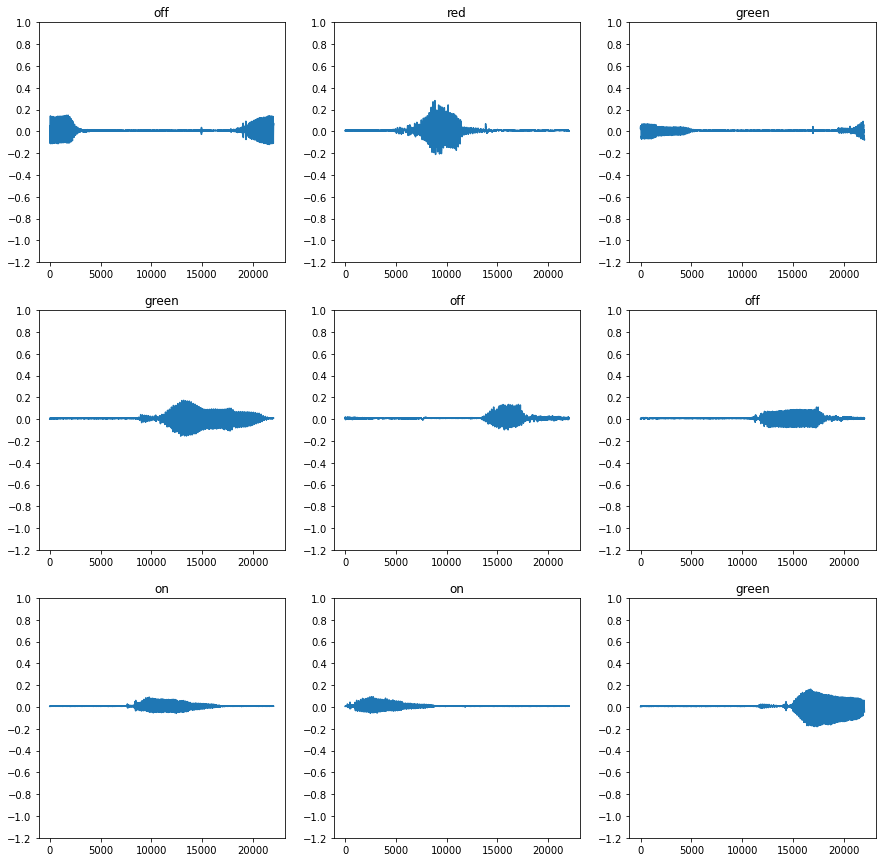

In [ ]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i, (audio, label) in enumerate(labled_wavform_dataset.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

## Spectrogram Conversion

- Single file waveform tensor to spectrogram conversion test

In [ ]:
for waveform , label in labled_wavform_dataset.take(20):
  f,t,spectrogram = signal.stft(waveform.numpy() , fs=22050, nperseg=255, noverlap = 124, nfft=256)
  spectrogram = tf.convert_to_tensor(np.abs(spectrogram))


spectrogram

<tf.Tensor: shape=(129, 170), dtype=float32, numpy=
array([[4.14465694e-03, 7.85487331e-03, 7.75669701e-03, ...,
        7.51739228e-03, 6.00589858e-03, 1.21236328e-04],
       [3.33577255e-03, 3.96495778e-03, 4.06982005e-03, ...,
        3.51724820e-03, 4.08230629e-03, 1.19271324e-04],
       [1.68535067e-03, 4.74775916e-05, 4.08058433e-04, ...,
        5.21664566e-04, 9.04441404e-04, 1.13559217e-04],
       ...,
       [4.91153241e-06, 8.83805228e-07, 1.25465317e-06, ...,
        5.21041898e-07, 1.95160228e-05, 5.28377495e-06],
       [4.27267832e-06, 1.57621741e-06, 1.24121493e-06, ...,
        1.33970730e-06, 2.01316543e-05, 5.27608108e-06],
       [3.82065127e-06, 2.05755327e-06, 1.48390700e-06, ...,
        1.42830550e-06, 2.11440856e-05, 5.27338398e-06]], dtype=float32)>

In [ ]:
for waveform, label in labled_wavform_dataset.take(1):
  spectrogram = tf.signal.stft(waveform, frame_length=255, frame_step=128)
  spectrogram = tf.abs(spectrogram)
  spectrogram = spectrogram[..., tf.newaxis]
  label = label.numpy().decode('utf-8')

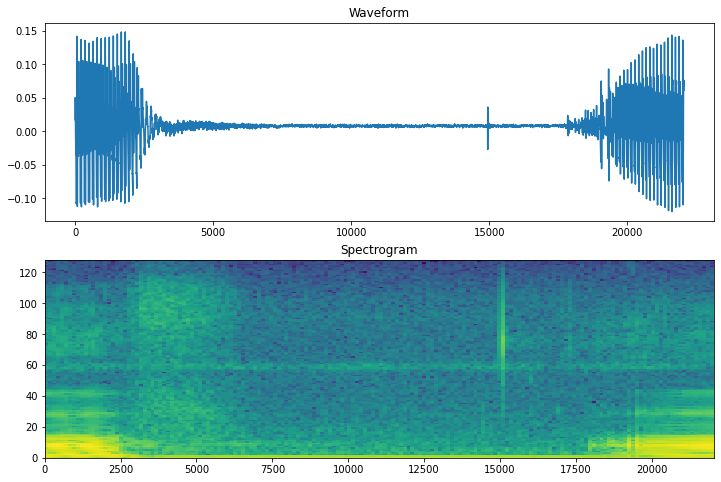

In [ ]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

- Splitting Data into 
  - Validation
  - Testing
  - Training

In [ ]:
training_dataset   =  audio_path_dataset[:140]
validation_dataset =  audio_path_dataset[140:170]
testing_dataset    =  audio_path_dataset[170:]

print("main Dataset Entries : ",len(audio_path_dataset))
print("Training Data Set entries :", len(training_dataset))
print("Validation Data Set entries :", len(validation_dataset))
print("Testing Data Set entries :", len(testing_dataset))

main Dataset Entries :  200
Training Data Set entries : 140
Validation Data Set entries : 30
Testing Data Set entries : 30


- Converting Raw Wav Path to Labled Spectrograms

In [ ]:
def path_to_labeled_tensor(file_path):
  label = tf.strings.split(file_path , os.path.sep)
  label = label[-2]

  wav_audio = tf.io.read_file(file_path)
  audio_tensor,sr = tf.audio.decode_wav(wav_audio)
  audio_tensor = tf.squeeze(audio_tensor , axis = -1)
  return audio_tensor , label

def stft(waveform):
  f, t, spec = signal.stft(waveform.numpy(), fs=22050, nperseg=255, noverlap = 124, nfft=256)
  return tf.convert_to_tensor(np.abs(spec))

def wavforms_to_spectrograms(waveform,label):
  
  spectrogram = tf.py_function(func=stft, inp=[waveform], Tout=tf.float32)
  spectrogram.set_shape( (129,170))
  spectrogram = tf.expand_dims(spectrogram , axis =0 )
  label = tf.math.argmax(label==labels)
  return spectrogram , label
  
def raw_wavefile_path_to_Spectrogram(input_path_dataset):
  data_tf_pipelines          = tf.data.Dataset.from_tensor_slices(input_path_dataset)
  labled_wavform_dataset     = data_tf_pipelines.map(path_to_labeled_tensor)
  spectrogram_labled_dataset = labled_wavform_dataset.map(wavforms_to_spectrograms)
  return spectrogram_labled_dataset

training_ds   = raw_wavefile_path_to_Spectrogram(audio_path_dataset)
testing_ds    = raw_wavefile_path_to_Spectrogram(testing_dataset)
validation_ds = raw_wavefile_path_to_Spectrogram(validation_dataset) 


In [ ]:
for waveform, label in training_ds.take(1):
  input_shape = waveform.shape

print("Input Shape ", input_shape)

Input Shape  (1, 129, 170)


In [ ]:
training_ds

<MapDataset element_spec=(TensorSpec(shape=(1, 129, 170), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

- Data into Batch

In [ ]:
num_batch = 1
train_data_batch = training_ds.batch(num_batch)
valid_data_batch = validation_ds.batch(num_batch)

## Building and Training Model

### First Model 
- Batch size = 1
- Loss logits = False


In [ ]:
norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_data_batch.map(lambda x, _: x))

audio_led_model = models.Sequential()

audio_led_model.add(layers.Input(shape=input_shape))
audio_led_model.add(preprocessing.Resizing(32, 32)) 
audio_led_model.add(norm_layer)
audio_led_model.add(layers.Conv2D(32, 3, activation='relu'))
audio_led_model.add(layers.Conv2D(64, 3, activation='relu'))
audio_led_model.add(layers.MaxPooling2D())
audio_led_model.add(layers.Dropout(0.25))
audio_led_model.add(layers.Flatten())
audio_led_model.add(layers.Dense(128, activation='relu'))
audio_led_model.add(layers.Dropout(0.5))
audio_led_model.add(layers.Dense(len(labels)))
audio_led_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 170)       0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 170)      341       
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        48992     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

- Compile Modle

In [ ]:
audio_led_model.compile(
    optimizer =  tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'],
)


In [ ]:
history_1 = audio_led_model.fit(train_data_batch ,validation_data= valid_data_batch , epochs = 25 )

Epoch 1/25
200/200 [==============================] - 15s 7ms/step - loss: 9.4244 - accuracy: 0.2700 - val_loss: 10.3640 - val_accuracy: 0.3000
Epoch 2/25
200/200 [==============================] - 1s 6ms/step - loss: 9.5948 - accuracy: 0.2450 - val_loss: 10.3640 - val_accuracy: 0.3000
Epoch 3/25
200/200 [==============================] - 1s 6ms/step - loss: 10.2601 - accuracy: 0.2450 - val_loss: 11.2827 - val_accuracy: 0.3000
Epoch 4/25
200/200 [==============================] - 1s 6ms/step - loss: 11.4742 - accuracy: 0.2450 - val_loss: 11.2827 - val_accuracy: 0.3000
Epoch 5/25
200/200 [==============================] - 1s 6ms/step - loss: 11.1761 - accuracy: 0.2450 - val_loss: 11.2827 - val_accuracy: 0.3000
Epoch 6/25
200/200 [==============================] - 1s 6ms/step - loss: 11.6111 - accuracy: 0.2500 - val_loss: 11.2827 - val_accuracy: 0.3000
Epoch 7/25
200/200 [==============================] - 1s 6ms/step - loss: 8.4871 - accuracy: 0.2250 - val_loss: 1.3863 - val_accuracy: 0.

### Second Model
- Batch Size = 1
- Loss Logits = True

In [ ]:
norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_data_batch.map(lambda x, _: x))

audio_led_model_2 = models.Sequential()

audio_led_model_2.add(layers.Input(shape=input_shape))
audio_led_model_2.add(preprocessing.Resizing(32, 32)) 
audio_led_model_2.add(norm_layer)
audio_led_model_2.add(layers.Conv2D(32, 3, activation='relu'))
audio_led_model_2.add(layers.Conv2D(64, 3, activation='relu'))
audio_led_model_2.add(layers.MaxPooling2D())
audio_led_model_2.add(layers.Dropout(0.25))
audio_led_model_2.add(layers.Flatten())
audio_led_model_2.add(layers.Dense(128, activation='relu'))
audio_led_model_2.add(layers.Dropout(0.5))
audio_led_model_2.add(layers.Dense(len(labels)))
audio_led_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 170)       0         
                                                                 
 normalization_1 (Normalizat  (None, 32, 32, 170)      341       
 ion)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        48992     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)       

In [ ]:
audio_led_model_2.compile(
    optimizer =  tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
)


In [ ]:
history_2 = audio_led_model_2.fit(train_data_batch ,validation_data= valid_data_batch , epochs = 25 )

Epoch 1/25
200/200 [==============================] - 2s 6ms/step - loss: 1.8202 - accuracy: 0.5150 - val_loss: 0.8656 - val_accuracy: 0.6333
Epoch 2/25
200/200 [==============================] - 1s 6ms/step - loss: 0.9643 - accuracy: 0.7700 - val_loss: 1.4524 - val_accuracy: 0.7667
Epoch 3/25
200/200 [==============================] - 1s 6ms/step - loss: 0.6492 - accuracy: 0.7850 - val_loss: 0.1274 - val_accuracy: 0.9667
Epoch 4/25
200/200 [==============================] - 1s 6ms/step - loss: 1.6136 - accuracy: 0.8200 - val_loss: 0.1404 - val_accuracy: 0.9667
Epoch 5/25
200/200 [==============================] - 2s 8ms/step - loss: 2.3292 - accuracy: 0.8050 - val_loss: 0.1726 - val_accuracy: 0.9333
Epoch 6/25
200/200 [==============================] - 1s 6ms/step - loss: 1.4073 - accuracy: 0.8850 - val_loss: 0.0668 - val_accuracy: 0.9667
Epoch 7/25
200/200 [==============================] - 1s 6ms/step - loss: 0.6315 - accuracy: 0.9150 - val_loss: 0.1813 - val_accuracy: 0.9333
Epoch 

### Third Model
- Batch Size = 2
- Loss Logits = True

In [ ]:
num_batch = 2
train_data_batch_1 = training_ds.batch(num_batch)
valid_data_batch_1 = validation_ds.batch(num_batch)

In [ ]:
norm_layer = preprocessing.Normalization()
norm_layer.adapt(train_data_batch_1.map(lambda x, _: x))

audio_led_model_3 = models.Sequential()

audio_led_model_3.add(layers.Input(shape=input_shape))
audio_led_model_3.add(preprocessing.Resizing(32, 32)) 
audio_led_model_3.add(norm_layer)
audio_led_model_3.add(layers.Conv2D(32, 3, activation='relu'))
audio_led_model_3.add(layers.Conv2D(64, 3, activation='relu'))
audio_led_model_3.add(layers.MaxPooling2D())
audio_led_model_3.add(layers.Dropout(0.25))
audio_led_model_3.add(layers.Flatten())
audio_led_model_3.add(layers.Dense(128, activation='relu'))
audio_led_model_3.add(layers.Dropout(0.5))
audio_led_model_3.add(layers.Dense(len(labels)))
audio_led_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 32, 32, 170)       0         
                                                                 
 normalization_2 (Normalizat  (None, 32, 32, 170)      341       
 ion)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        48992     
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)       

In [ ]:
audio_led_model_3.compile(
    optimizer =  tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'],
)


In [ ]:
history_3 = audio_led_model_3.fit(train_data_batch_1 ,validation_data= valid_data_batch_1 , epochs = 25 )

Epoch 1/25
100/100 [==============================] - 2s 10ms/step - loss: 1.3220 - accuracy: 0.5950 - val_loss: 0.2889 - val_accuracy: 0.8667
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 0.6944 - accuracy: 0.8450 - val_loss: 0.1640 - val_accuracy: 0.9333
Epoch 3/25
100/100 [==============================] - 1s 8ms/step - loss: 0.9942 - accuracy: 0.8050 - val_loss: 0.1764 - val_accuracy: 0.9333
Epoch 4/25
100/100 [==============================] - 1s 8ms/step - loss: 0.5595 - accuracy: 0.9000 - val_loss: 0.1170 - val_accuracy: 0.9667
Epoch 5/25
100/100 [==============================] - 1s 8ms/step - loss: 0.7145 - accuracy: 0.8950 - val_loss: 0.0488 - val_accuracy: 1.0000
Epoch 6/25
100/100 [==============================] - 1s 8ms/step - loss: 0.3207 - accuracy: 0.9200 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 7/25
100/100 [==============================] - 1s 8ms/step - loss: 0.2657 - accuracy: 0.9400 - val_loss: 0.0881 - val_accuracy: 0.9667
Epoch

## Models Performance Comparison

- Loss Comparisons

Text(0.5, 1.0, 'Model:3 B:2 , Logits:True')

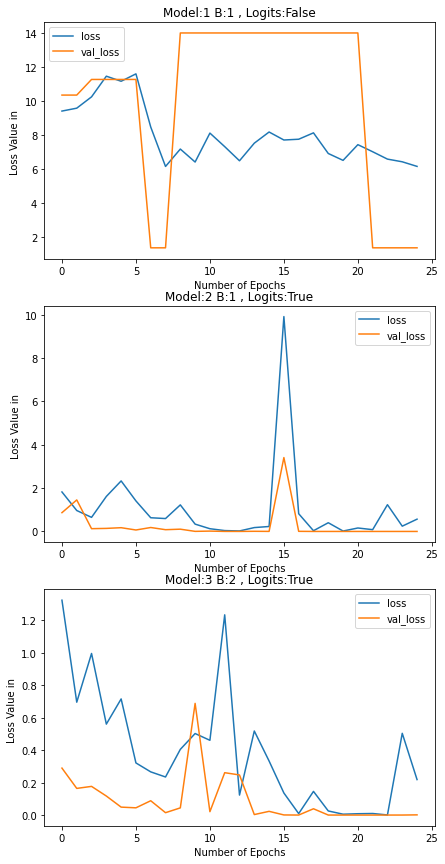

In [ ]:
wavefile_plotter = plt.figure(figsize=(7,20)) 
metrics_1  = wavefile_plotter.add_subplot(411)
metrics_2  = wavefile_plotter.add_subplot(412)
metrics_3  = wavefile_plotter.add_subplot(413)

metrics = history_1.history
metrics_1.plot(history_1.epoch, metrics['loss'], metrics['val_loss'])
metrics_1.legend(['loss', 'val_loss'])
metrics_1.set_xlabel("Number of Epochs")
metrics_1.set_ylabel('Loss Value in ')
metrics_1.set_title("Model:1 B:1 , Logits:False")

metrics = history_2.history
metrics_2.plot(history_2.epoch, metrics['loss'], metrics['val_loss'])
metrics_2.legend(['loss', 'val_loss'])
metrics_2.set_xlabel("Number of Epochs")
metrics_2.set_ylabel('Loss Value in ')
metrics_2.set_title("Model:2 B:1 , Logits:True")

metrics = history_3.history
metrics_3.plot(history_3.epoch, metrics['loss'], metrics['val_loss'])
metrics_3.legend(['loss', 'val_loss'])
metrics_3.set_xlabel("Number of Epochs")
metrics_3.set_ylabel('Loss Value in ')
metrics_3.set_title("Model:3 B:2 , Logits:True")

- Accuracy Comparisons

Text(0.5, 1.0, 'Model:3 B:2 , Logits:True')

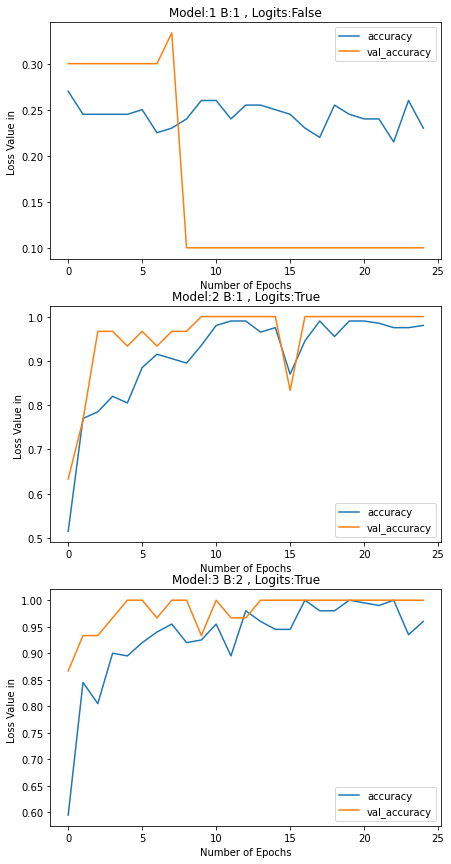

In [ ]:
wavefile_plotter = plt.figure(figsize=(7,20)) 
metrics_1  = wavefile_plotter.add_subplot(411)
metrics_2  = wavefile_plotter.add_subplot(412)
metrics_3  = wavefile_plotter.add_subplot(413)

metrics = history_1.history
metrics_1.plot(history_1.epoch, metrics['accuracy'], metrics['val_accuracy'])
metrics_1.legend(['accuracy', 'val_accuracy'])
metrics_1.set_xlabel("Number of Epochs")
metrics_1.set_ylabel('Loss Value in ')
metrics_1.set_title("Model:1 B:1 , Logits:False")

metrics = history_2.history
metrics_2.plot(history_2.epoch, metrics['accuracy'], metrics['val_accuracy'])
metrics_2.legend(['accuracy', 'val_accuracy'])
metrics_2.set_xlabel("Number of Epochs")
metrics_2.set_ylabel('Loss Value in ')
metrics_2.set_title("Model:2 B:1 , Logits:True")

metrics = history_3.history
metrics_3.plot(history_3.epoch, metrics['accuracy'], metrics['val_accuracy'])
metrics_3.legend(['accuracy', 'val_accuracy'])
metrics_3.set_xlabel("Number of Epochs")
metrics_3.set_ylabel('Loss Value in ')
metrics_3.set_title("Model:3 B:2 , Logits:True")

- Test Data Predictions


In [ ]:
test_specs  = []
testdata_labels = []
for spectrogram , label in testing_ds:
  test_specs.append(spectrogram.numpy())
  testdata_labels.append(label.numpy())


test_specs = np.array(test_specs)
testdata_labels = np. array(testdata_labels)

In [ ]:
model_prediction = audio_led_model_3.predict(test_specs)

print(" All Labels :" , labels)
print("Model Predictions :", model_prediction[10])
print("Actual Label :",testdata_labels[10])
print("Max Value of prediction :" , np.argmax(model_prediction[10]))

 All Labels : ['off' 'on' 'green' 'red']
Model Predictions : [  0.2282763  28.68038    -5.7723317 -14.020389 ]
Actual Label : 1
Max Value of prediction : 1


In [ ]:
model_prediction_labels = np.argmax(audio_led_model_3.predict(test_specs) , axis =1)
model_prediction_labels

array([3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 3, 0, 3, 0, 1, 2, 3, 2, 3,
       3, 3, 0, 1, 3, 0, 1, 2])

- Confusion matrix

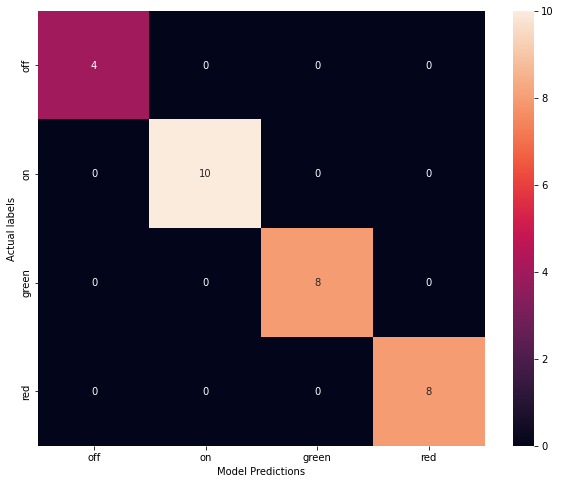

In [ ]:
confusion_matrix = tf.math.confusion_matrix(testdata_labels,model_prediction_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix,yticklabels=labels,xticklabels=labels,annot=True, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('Actual labels')
plt.show()

- Saving Model

In [ ]:
audio_led_model_3.save("/content/audio_led_model_3.h5")

## TensorFlow Lite Coversion and Comparisons

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(audio_led_model_3)
converter.optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp1ihrbvi4/assets


INFO:tensorflow:Assets written to: /tmp/tmp1ihrbvi4/assets


In [ ]:
open("audio_led_model_3.tflite","wb").write(tflite_model)
print("Main Model Size :" , round((os.path.getsize("/content/audio_led_model_3.h5"))/(1024*1024) ,3 ) , "MB")
print("Lite Model Size :" , round((os.path.getsize("/content/audio_led_model_3.tflite"))/(1024*1024),3 ), "MB"  )

Main Model Size : 19.204 MB
Lite Model Size : 6.39 MB


- Testing TFLite Model

In [ ]:
interpreter = tf.lite.Interpreter('/content/audio_led_model_3.tflite')

input_details   = interpreter.get_input_details()
output_details = interpreter.get_output_details()


print(input_details)

print("-"*10)
print(output_details)
print("-"*10)
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

[{'name': 'serving_default_input_3:0', 'index': 0, 'shape': array([  1,   1, 129, 170], dtype=int32), 'shape_signature': array([ -1,   1, 129, 170], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
[{'name': 'StatefulPartitionedCall:0', 'index': 21, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([-1,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
Input Shape: [  1   1 129 170]
Input Type: <class 'numpy.float32'>
Output Shape: [1 4]
Output Type: <class 'numpy.float32'>


 - Inferencing

In [ ]:
test_file = '/content/data/red/red_1.wav'

test_single_file = raw_wavefile_path_to_Spectrogram([str(test_file)])

for spectrogram , label in test_single_file.batch(1):
  interpreter.allocate_tensors()
  interpreter.set_tensor(input_details[0]['index'] , spectrogram)
  interpreter.invoke()

  tflite_prediction_result = interpreter.get_tensor(output_details[0]['index'])
  print("Lite Model Predictions :",tflite_prediction_result, "\n" ) #  labels[np.argmax(tflite_prediction_result)] 

Lite Model Predictions : [[-10.525799  11.268749 -18.565294  77.58388 ]] 



In [ ]:
labels

array(['off', 'on', 'green', 'red'], dtype='<U5')